In [108]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [109]:
#Load Dataset
df = pd.read_csv('../data/raw/flight_delays.csv')
print(f"Shape: {df.shape}")

Shape: (16999, 16)


In [110]:
#Initial Data Exploration
display(df.head())
df.info()

,FlightID,Airline,FlightNumber,Origin,Destination,ScheduledDeparture,ActualDeparture,ScheduledArrival,ActualArrival,DelayMinutes,DelayReason,Cancelled,Diverted,AircraftType,TailNumber,Distance
0,1,United,4558,ORD,MIA,09/01/2024 08:11,9/1/2024 8:30,09/01/2024 14:45,9/1/2024 12:19,8,Weather,True,False,Boeing 737,N71066,1031
1,2,Delta,8021,LAX,MIA,09/01/2024 10:25,9/1/2024 10:41,09/01/2024 16:32,9/1/2024 13:27,2,Air Traffic Control,True,True,Airbus A320,N22657,1006
2,3,Southwest,7520,DFW,SFO,09/01/2024 16:53,9/1/2024 17:05,09/01/2024 18:08,9/1/2024 18:07,14,Weather,True,True,Boeing 737,N95611,2980
3,4,Delta,2046,ORD,BOS,09/01/2024 14:44,9/1/2024 15:04,09/01/2024 16:02,9/1/2024 18:34,-10,NaN,False,False,Boeing 777,N90029,1408
4,5,Delta,6049,LAX,SEA,09/01/2024 01:51,9/1/2024 2:08,09/01/2024 07:35,9/1/2024 6:15,24,Air Traffic Control,False,True,Boeing 737,N27417,2298


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16999 entries, 0 to 16998
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FlightID            16999 non-null  int64 
 1   Airline             16999 non-null  object
 2   FlightNumber        16999 non-null  int64 
 3   Origin              16999 non-null  object
 4   Destination         16999 non-null  object
 5   ScheduledDeparture  16999 non-null  object
 6   ActualDeparture     16999 non-null  object
 7   ScheduledArrival    16999 non-null  object
 8   ActualArrival       16999 non-null  object
 9   DelayMinutes        16999 non-null  int64 
 10  DelayReason         12328 non-null  object
 11  Cancelled           16999 non-null  bool  
 12  Diverted            16999 non-null  bool  
 13  AircraftType        16999 non-null  object
 14  TailNumber          16999 non-null  object
 15  Distance            16999 non-null  int64 
dtypes: bool(2), int64(4), 

In [111]:
#Check Missing Values
missing_values = df.isnull().sum()

print(missing_values[missing_values > 0])

DelayReason    4671
dtype: int64


In [112]:
# Drop Unnecessary Columns

# Drop identifiers, and data leakage columns
columns_to_drop = [
    'FlightID',      
    'FlightNumber',  
    'TailNumber',    
    'DelayReason',
    'ActualDeparture',  
    'ActualArrival',    
    'Cancelled',        
    'Diverted'          
]

columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=columns_to_drop)

print(f"Dropped {len(columns_to_drop)} columns:")
for col in columns_to_drop:
    print(f"{col}")

print(f"\nShape after dropping: {df.shape}")
print(f"Remaining columns: {list(df.columns)}")

Dropped 8 columns:
FlightID
FlightNumber
TailNumber
DelayReason
ActualDeparture
ActualArrival
Cancelled
Diverted

Shape after dropping: (16999, 8)
Remaining columns: ['Airline', 'Origin', 'Destination', 'ScheduledDeparture', 'ScheduledArrival', 'DelayMinutes', 'AircraftType', 'Distance']


In [113]:
# Convert Date & Time Columns
datetime_cols = [
    "ScheduledDeparture",
    "ScheduledArrival",
]

for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

print("\nUpdated data types:")
print(df[datetime_cols].dtypes)


Updated data types:
ScheduledDeparture    datetime64[ns]
ScheduledArrival      datetime64[ns]
dtype: object


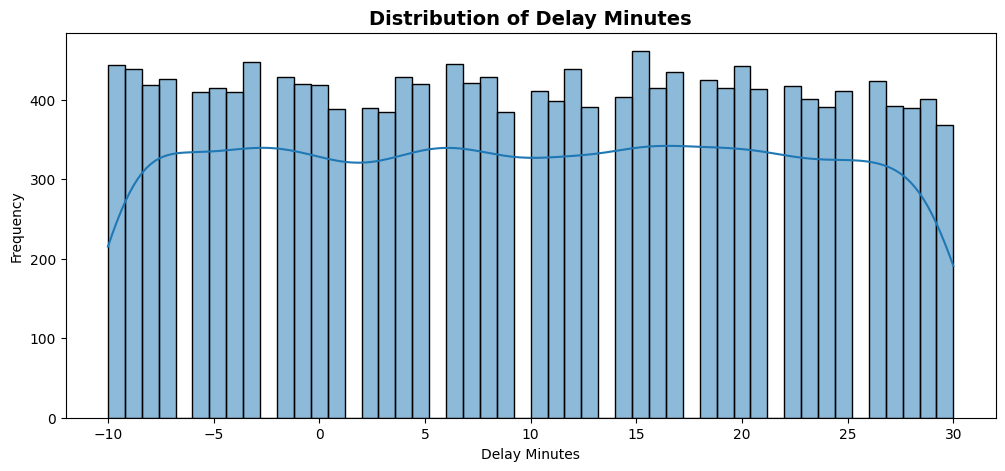


Delay Minutes Statistics:
count    16999.000000
mean         9.810518
std         11.800442
min        -10.000000
25%         -1.000000
50%         10.000000
75%         20.000000
max         30.000000
Name: DelayMinutes, dtype: float64


In [114]:
#EXPLORATORY DATA ANALYSIS (EDA)
plt.figure(figsize=(12, 5))

# Histogram with KDE
sns.histplot(df['DelayMinutes'], bins=50, kde=True)
plt.title('Distribution of Delay Minutes', fontsize=14, fontweight='bold')
plt.xlabel('Delay Minutes')
plt.ylabel('Frequency')
plt.show()

print(f"\nDelay Minutes Statistics:")
print(df['DelayMinutes'].describe())

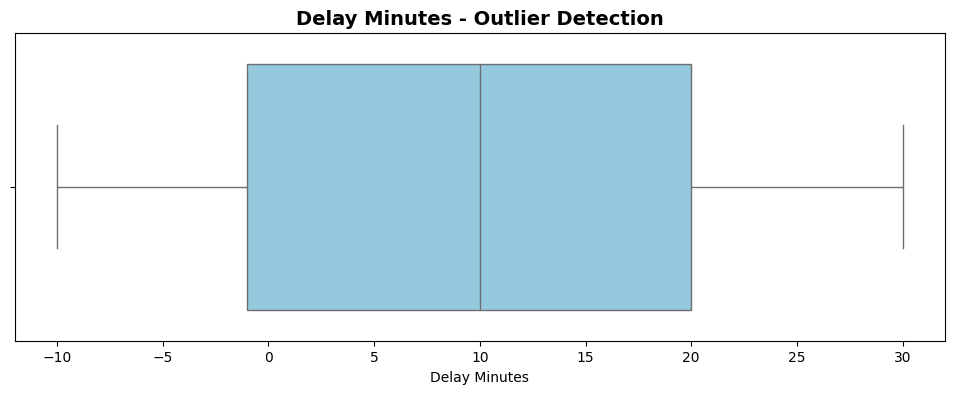


Outlier Analysis:
Q1 (25th percentile): -1.00
Q3 (75th percentile): 20.00
IQR: 21.00
Lower Bound: -32.50
Upper Bound: 51.50
Number of outliers: 0 (0.00%)


In [115]:
#EDA - Boxplot for Outlier Detection
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['DelayMinutes'], color='skyblue')
plt.title('Delay Minutes - Outlier Detection', fontsize=14, fontweight='bold')
plt.xlabel('Delay Minutes')
plt.show()

# Calculate outlier statistics
Q1 = df['DelayMinutes'].quantile(0.25)
Q3 = df['DelayMinutes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['DelayMinutes'] < lower_bound) | (df['DelayMinutes'] > upper_bound)]
print(f"\nOutlier Analysis:")
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

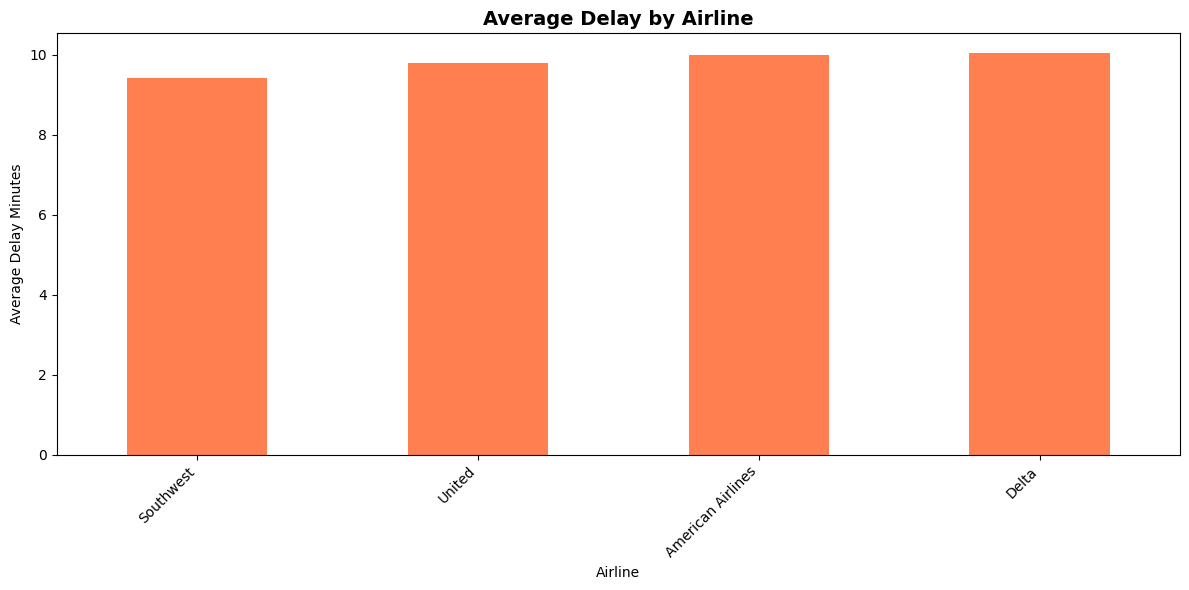


Average Delay by Airline:
Airline
Southwest             9.421310
United                9.800654
American Airlines     9.993792
Delta                10.033270
Name: DelayMinutes, dtype: float64


In [116]:
#EDA - Average Delay by Airline
plt.figure(figsize=(12, 6))
avg_delay_by_airline = df.groupby('Airline')['DelayMinutes'].mean().sort_values()
avg_delay_by_airline.plot(kind='bar', color='coral')
plt.title('Average Delay by Airline', fontsize=14, fontweight='bold')
plt.xlabel('Airline')
plt.ylabel('Average Delay Minutes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nAverage Delay by Airline:")
print(avg_delay_by_airline)

In [117]:
#Data Quality - Fix Negative Delays & Remove Duplicates

# Fix negative Delay Minutes (early arrivals - set to 0)
negative_delays = (df["DelayMinutes"] < 0).sum()
df["DelayMinutes"] = df["DelayMinutes"].apply(lambda x: max(x, 0))

# Remove duplicates
duplicates = df.duplicated().sum()
df = df.drop_duplicates()

In [118]:
#Feature Engineering

# Scheduled flight duration
df['ScheduledDuration'] = (df['ScheduledArrival'] - df['ScheduledDeparture']).dt.total_seconds() / 60

# Extract datetime features from ScheduledDeparture
df['DepartureHour'] = df['ScheduledDeparture'].dt.hour
df['DepartureDay'] = df['ScheduledDeparture'].dt.dayofweek 
df['DepartureMonth'] = df['ScheduledDeparture'].dt.month
df['IsWeekend'] = (df['ScheduledDeparture'].dt.dayofweek >= 5).astype(int)

print(f"\nShape after feature engineering: {df.shape}")
print("Created features: ScheduledDuration, DepartureHour, DepartureDay, DepartureMonth, IsWeekend")
display(df[['ScheduledDuration', 'DepartureHour', 'DepartureDay', 'DepartureMonth', 'IsWeekend']].head())



Shape after feature engineering: (16999, 13)
Created features: ScheduledDuration, DepartureHour, DepartureDay, DepartureMonth, IsWeekend


,ScheduledDuration,DepartureHour,DepartureDay,DepartureMonth,IsWeekend
0,394.0,8,6,9,1
1,367.0,10,6,9,1
2,75.0,16,6,9,1
3,78.0,14,6,9,1
4,344.0,1,6,9,1


In [119]:
# Drop Datetime Columns (features already extracted)
columns_to_drop = ['ScheduledDeparture', 'ScheduledArrival']
df = df.drop(columns=columns_to_drop)

print(f"Dropped datetime columns: {columns_to_drop}")
print(f"Shape after dropping datetime columns: {df.shape}")
print(f"\nVerifying ScheduledDuration still exists: {'ScheduledDuration' in df.columns}")

Dropped datetime columns: ['ScheduledDeparture', 'ScheduledArrival']
Shape after dropping datetime columns: (16999, 11)

Verifying ScheduledDuration still exists: True


In [120]:
# Check Skewness of Numeric Features
numeric_cols_check = ['DelayMinutes', 'Distance', 'ScheduledDuration']

for col in numeric_cols_check:
    if col in df.columns:
        skewness = df[col].skew()
        print(f"{col:20s}: {skewness:6.2f} {'(highly skewed)' if abs(skewness) > 1 else ''}")
    
print("\nSkewness > 1 or < -1 indicates high skewness")

DelayMinutes        :   0.35 
Distance            :  -0.00 
ScheduledDuration   :  -0.00 

Skewness > 1 or < -1 indicates high skewness


In [121]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Label encoding for nominal categories 
label_encode_cols = ['Airline', 'Origin', 'Destination', 'AircraftType']

le = LabelEncoder()
for col in label_encode_cols:
    df[f'{col}_Encoded'] = le.fit_transform(df[col])

# Drop original categorical columns
df_encoded = df.drop(columns=label_encode_cols)

print(f"\nShape after encoding: {df_encoded.shape}")



Shape after encoding: (16999, 11)


In [122]:
# Feature Scaling (Standardization)

# Identify numeric columns to scale 
numeric_cols = [
    'Distance', 'ScheduledDuration', 'DepartureHour'
]

# Only scale columns that exist
numeric_cols = [col for col in numeric_cols if col in df_encoded.columns]

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print(f"Scaled {len(numeric_cols)} numeric features using StandardScaler")
print(f"Scaled features: {numeric_cols}")

Scaled 3 numeric features using StandardScaler
Scaled features: ['Distance', 'ScheduledDuration', 'DepartureHour']


In [123]:
#Final Data Summary
print(f"Shape: {df_encoded.shape}")
print(f"Rows: {df_encoded.shape[0]:,}")
print(f"Columns: {df_encoded.shape[1]}")
print(f"Missing values: {df_encoded.isnull().sum().sum()}")
print(df_encoded.dtypes.value_counts())
display(df_encoded.head(10))

Shape: (16999, 11)
Rows: 16,999
Columns: 11
Missing values: 0
int64      6
float64    3
int32      2
Name: count, dtype: int64


,DelayMinutes,Distance,ScheduledDuration,DepartureHour,DepartureDay,DepartureMonth,IsWeekend,Airline_Encoded,Origin_Encoded,Destination_Encoded,AircraftType_Encoded
0,8,-0.623216,1.494821,-0.501948,6,9,1,3,4,2,1
1,2,-0.653002,1.234014,-0.212971,6,9,1,1,3,2,0
2,14,1.698826,-1.586569,0.653959,6,9,1,2,1,4,1
3,0,-0.174058,-1.557590,0.364982,6,9,1,1,4,0,2
4,24,0.886290,1.011845,-1.513366,6,9,1,1,3,3,1
5,0,-0.200269,0.036232,-1.079901,6,9,1,2,3,1,2
6,7,0.142855,1.156738,-0.935413,6,9,1,2,4,1,2
7,24,1.640447,0.248742,-1.368878,6,9,1,2,1,2,2
8,2,0.932754,1.581757,-1.657855,6,9,1,0,4,2,0
9,25,-1.130754,-0.475723,-0.212971,6,9,1,2,3,0,2


In [124]:
# Save Preprocessed Data
output_path = '../data/processed/flight_delays_preprocessed.csv'
df_encoded.to_csv(output_path, index=False)